In [75]:
import pandas as pd
import numpy as np

Read the data into six separate dataframes.

In [76]:
df1 = pd.read_csv("turnstile_200606.csv")
df2 = pd.read_csv("turnstile_200530.csv")
df3 = pd.read_csv("turnstile_200411.csv")
df4 = pd.read_csv("turnstile_200321.csv")
df5 = pd.read_csv("turnstile_200208.csv")
df6 = pd.read_csv("turnstile_200118.csv")

Concatenate the data into one dataframe.

In [77]:
df = pd.concat([df1, df2, df3, df4, df5, df6])

In [78]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


The DATE and TIME columns are object datatypes, which in Pandas is a string.

In [9]:
print('DATE datatype: {}, TIME datatype: "{}"'.format(df['DATE'].dtypes, df['TIME'].dtypes))

DATE datatype: object, TIME datatype: "object"


In [10]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

After conversion, the datatype for the DATETIME column is a datetime.

In [11]:
df['DATETIME'].dtypes

dtype('<M8[ns]')

In [12]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


The total entries for each turnstile are observed using the `groupby` function in Pandas.

In [13]:
df.groupby(['C/A', 'UNIT', 'SCP', 'STATION']).sum()

ENTRIES  \
C/A   UNIT SCP      STATION                     
A002  R051 02-00-00 59 ST          1856312674   
           02-00-01 59 ST          1656360047   
           02-03-00 59 ST           344531036   
           02-03-01 59 ST           360029390   
           02-03-02 59 ST          1643674329   
...                                       ...   
TRAM2 R469 00-00-01 RIT-ROOSEVELT   868760892   
           00-03-00 RIT-ROOSEVELT   188318641   
           00-03-01 RIT-ROOSEVELT   788266243   
           00-05-00 RIT-ROOSEVELT      774684   
           00-05-01 RIT-ROOSEVELT     1399608   

                                   EXITS                                                                 
C/A   UNIT SCP      STATION                                                                              
A002  R051 02-00-00 59 ST                                                  630021138                     
           02-00-01 59 ST                                                  372796746                     
           02-03-00 59 ST                                                 1297828534                     
           02-03-01 59 ST                                                  556973462                     
           02-03-02 59 ST                                                 2194517735                     
...                                                                              ...                     
TRAM2 R469 00-00-01 RIT-ROOSEVELT                                           10683165                     
           00-03-00 RIT-ROOSEVELT                                            7505729                     
           00-03-01 RIT-ROOSEVELT                                           99865512                     
           00-05-00 RIT-ROOSEVELT                                              15624                     
           00-05-01 RIT-ROOSEVELT                                             121352                     

[4974 rows x 2 columns]

In [15]:
df.groupby(['DATE']).sum()

,ENTRIES,EXITS
DATE,,
01/11/2020,1239367381882,1005654719915
01/12/2020,1241475825843,1006777544277
01/13/2020,1252572944425,1012682957082
01/14/2020,1248879513379,1013698288115
01/15/2020,1236358721964,1002633424552
01/16/2020,1249702198185,1011565994956
01/17/2020,1247278048698,1013213644458
02/01/2020,1241459246059,1012149087819
02/02/2020,1244905227437,1019681965895


In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

Select one turnstile (combination of [C/A, UNIT, SCP, STATION])

In [50]:
one_ts = df.loc[(df['C/A'] == 'TRAM2') & (df['UNIT'] == 'R469') & (df['SCP'] == '00-00-00') & (df['STATION'] == 'RIT-ROOSEVELT')]
one_ts.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
207640,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/30/2020,01:00:00,REGULAR,586736,11682,2020-05-30 01:00:00
207641,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/30/2020,05:00:00,REGULAR,586736,11682,2020-05-30 05:00:00
207642,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/30/2020,09:00:00,REGULAR,586775,11682,2020-05-30 09:00:00
207643,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/30/2020,13:00:00,REGULAR,586868,11685,2020-05-30 13:00:00
207644,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/30/2020,17:00:00,REGULAR,587032,11686,2020-05-30 17:00:00


Plot the turnstile.

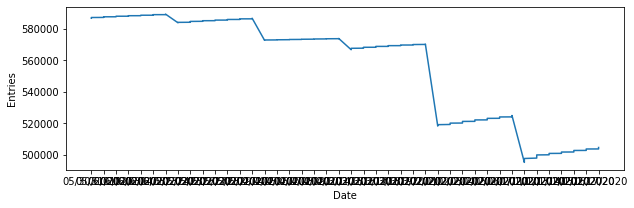

In [69]:
plt.figure(figsize=(10,3))

plt.plot(one_ts['DATE'], one_ts['ENTRIES'])
plt.xlabel('Date')
plt.ylabel('Entries')

#plt.locator_params(axis='y', nbins=6)
#plt.locator_params(axis='x', nbins=7)

plt.show()

Combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, sum the counts from each turnstile belonging to that combo. 

In [71]:
df.groupby(['C/A', 'UNIT', 'STATION', 'DATE']).sum()

ENTRIES  \
C/A   UNIT STATION       DATE                    
A002  R051 59 ST         01/11/2020  345377609   
                         01/12/2020  345429236   
                         01/13/2020  345484015   
                         01/14/2020  345560306   
                         01/15/2020  345635585   
...                                        ...   
TRAM2 R469 RIT-ROOSEVELT 06/01/2020   47781289   
                         06/02/2020   47785898   
                         06/03/2020   47790047   
                         06/04/2020   47794281   
                         06/05/2020   47798806   

                                     EXITS                                                                 
C/A   UNIT STATION       DATE                                                                              
A002  R051 59 ST         01/11/2020                                          193946103                     
                         01/12/2020                                          193983788                     
                         01/13/2020                                          194026938                     
                         01/14/2020                                          194078145                     
                         01/15/2020                                          194128895                     
...                                                                                ...                     
TRAM2 R469 RIT-ROOSEVELT 06/01/2020                                            2901383                     
                         06/02/2020                                            2901773                     
                         06/03/2020                                            2902103                     
                         06/04/2020                                            2902479                     
                         06/05/2020                                            2902860                     

[31341 rows x 2 columns]

WARREN'S CHANGES HERE

In [299]:
#investigate obs
# mask = (df['STATION']=="103 ST") & (df['SCP']=="00-00-00") & (df['DATE'] == '01/11/2020') #& (df['DATE'] == pd.Timestamp('2020-01-11'))
# df[mask].sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION','DATE', 'TIME'])
# df.iloc[1059:1061]

In [300]:
df=df.sort_values(by=['C/A', 'UNIT', 'SCP', 'STATION','DATE', 'TIME'])

mindf = df.drop_duplicates(['C/A', 'UNIT', 'SCP', 'STATION','DATE'], keep='first')
maxdf = df.drop_duplicates(['C/A', 'UNIT', 'SCP', 'STATION','DATE'], keep='last')
day_df = mindf.merge(maxdf,on = ['C/A', 'UNIT', 'SCP', 'STATION','DATE'], validate='1:1', suffixes =['_min','_max'])
exits = 'EXITS                                                               '
day_df = day_df.rename(columns = {'LINENAME_min':'LINENAME','DIVISION_min':'DIVISION' \
                                  ,'DESC_min':'DESC',exits+"_min":"EXITS_min" \
                                  , exits+"_max":"EXITS_max"})
day_df['D_ENTRIES'] = day_df['ENTRIES_max']-day_df['ENTRIES_min']
day_df['D_EXITS'] = day_df['EXITS_max'] - day_df['EXITS_min']

day_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE',
       'TIME_min', 'DESC', 'ENTRIES_min', 'EXITS_min', 'LINENAME_max',
       'DIVISION_max', 'TIME_max', 'DESC_max', 'ENTRIES_max', 'EXITS_max',
       'D_ENTRIES', 'D_EXITS'],
      dtype='object')

In [301]:
day_df =day_df.drop(columns=['LINENAME_max', 'DIVISION_max','DESC_max'])

In [302]:
day_df['DATE'] = pd.to_datetime(day_df['DATE'])
day_df['DOW'] = day_df['DATE'].dt.dayofweek

In [303]:
day_df = day_df[['C/A','UNIT','SCP','STATION','LINENAME','DIVISION','DATE','DOW' \
                 , 'DESC','TIME_min','ENTRIES_min','EXITS_min','TIME_max' \
                 ,'ENTRIES_max','EXITS_max','D_ENTRIES','D_EXITS']]
day_df.sort_values(by=['C/A','UNIT','SCP','STATION','DATE']).head(14)

day_df['daysfromsat'] = day_df['DOW']
day_df.loc[day_df['DOW'] < 5,'daysfromsat'] = day_df['DOW'] + 7
day_df['daysfromsat'] = day_df['daysfromsat'] - 5
day_df['daysfrompub'] = 7 - day_df['daysfromsat'] 
day_df['daysfrompub'] = pd.to_timedelta(day_df['daysfrompub'],unit="d")
day_df['PUBDATE'] = day_df['daysfrompub'] + day_df['DATE']

In [304]:
day_df = day_df.drop(columns=['daysfromsat','daysfrompub'])

In [338]:
day_df.sample(n=5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DOW,DESC,TIME_min,ENTRIES_min,EXITS_min,TIME_max,ENTRIES_max,EXITS_max,D_ENTRIES,D_EXITS,PUBDATE
80933,N312,R339,00-00-01,36 ST,MR,IND,2020-05-24,6,REGULAR,01:00:00,573485,322464,21:00:00,573506,322483,21,19,2020-05-30
192282,R532H,R328,02-06-01,METS-WILLETS PT,7,IRT,2020-02-06,3,REGULAR,00:00:00,33232,345429,20:00:00,33232,345429,0,0,2020-02-08
131547,R111,R027,00-00-02,WALL ST,23,IRT,2020-06-02,1,REGULAR,00:00:00,7084732,10331136,20:00:00,7084768,10331289,36,153,2020-06-06
160268,R238A,R046,02-00-00,GRD CNTRL-42 ST,4567S,IRT,2020-05-28,3,REGULAR,00:00:00,780997,95643,20:00:00,781362,95772,365,129,2020-05-30
6428,A039,R085,01-06-00,8 ST-NYU,NRW,BMT,2020-06-01,0,REGULAR,00:00:00,68978372,17919098,20:00:00,68978421,17919121,49,23,2020-06-06


In [339]:
day_df[day_df['D_ENTRIES']>0]['D_ENTRIES'].describe()

count    1.772490e+05
mean     1.577162e+04
std      4.279603e+06
min      1.000000e+00
25%      5.800000e+01
50%      1.850000e+02
75%      5.920000e+02
max      1.621027e+09
Name: D_ENTRIES, dtype: float64

(-250000.0, 500000.0)

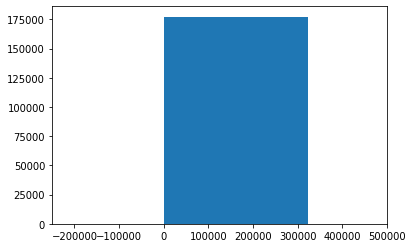

In [340]:
plt.hist(day_df[day_df['D_ENTRIES']>0]['D_ENTRIES'].values, bins=5000)

plt.xlim(-0.25e6,0.5e6)

# Challenge 9

In [360]:
# removing negative values
clean_day_df= day_df[day_df['D_ENTRIES']>0]

# removing outliers (see data validation)
clean_day_df = clean_day_df[clean_day_df['D_ENTRIES']<=586386]

station_df = clean_day_df.groupby('STATION')['D_ENTRIES'].sum().reset_index()
station_df.sort_values(by="D_ENTRIES",ascending=False).head(10)

,STATION,D_ENTRIES
61,34 ST-PENN STA,2127613
233,GRD CNTRL-42 ST,1755638
59,34 ST-HERALD SQ,1546369
46,23 ST,1509127
85,59 ST,1458442
110,86 ST,1252122
9,125 ST,1247160
14,14 ST-UNION SQ,1242046
226,FULTON ST,1238014
68,42 ST-PORT AUTH,1235119


# Challenge 10

(array([255.,  79.,  22.,   8.,   3.,   6.,   1.,   2.,   1.,   1.]),
 array([   3757. ,  216142.6,  428528.2,  640913.8,  853299.4, 1065685. ,
        1278070.6, 1490456.2, 1702841.8, 1915227.4, 2127613. ]),
 <a list of 10 Patch objects>)

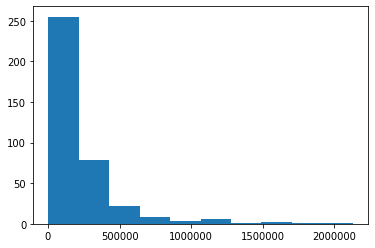

In [364]:
total_ridership_values = station_df['D_ENTRIES'].values
plt.hist(total_ridership_values)


<BarContainer object of 378 artists>

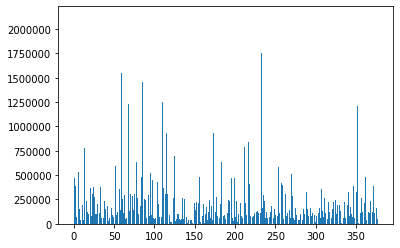

In [365]:
indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)

# Data Validation

In [306]:
# Erroneous?
errors = day_df[day_df['D_ENTRIES']<0]
error_stations = errors.groupby(['C/A','UNIT','SCP','STATION','PUBDATE']).size().reset_index()

print("number of errors is ", len(errors))
errors.head()

number of errors is  1867


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DOW,DESC,TIME_min,ENTRIES_min,EXITS_min,TIME_max,ENTRIES_max,EXITS_max,D_ENTRIES,D_EXITS,PUBDATE
1060,A007,R079,01-06-03,5 AV/59 ST,NQRW,BMT,2020-04-07,1,REGULAR,02:00:00,7832195,2864415,22:00:00,4,2,-7832191,-2864413,2020-04-11
1624,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-01-11,5,REGULAR,03:00:00,885732843,490036237,23:00:00,885732453,490034596,-390,-1641,2020-01-18
1625,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-01-12,6,REGULAR,03:00:00,885732381,490034512,23:00:00,885732015,490033283,-366,-1229,2020-01-18
1626,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-01-13,0,REGULAR,03:00:00,885731991,490033257,23:00:00,885730804,490029956,-1187,-3301,2020-01-18
1627,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-01-14,1,REGULAR,03:00:00,885730737,490029909,23:00:00,885729667,490026348,-1070,-3561,2020-01-18


In [307]:
error_stations.drop(columns=[0], axis=1)

,C/A,UNIT,SCP,STATION,PUBDATE
0,A007,R079,01-06-03,5 AV/59 ST,2020-04-11
1,A011,R080,01-03-00,57 ST-7 AV,2020-01-18
2,A011,R080,01-03-00,57 ST-7 AV,2020-02-08
3,A011,R080,01-03-00,57 ST-7 AV,2020-03-21
4,A011,R080,01-03-00,57 ST-7 AV,2020-04-11
...,...,...,...,...,...
322,R730,R431,00-00-04,EASTCHSTER/DYRE,2020-02-08
323,R730,R431,00-00-04,EASTCHSTER/DYRE,2020-03-21
324,R730,R431,00-00-04,EASTCHSTER/DYRE,2020-04-11
325,R730,R431,00-00-04,EASTCHSTER/DYRE,2020-05-30


In [335]:
# construct raw data with pubdate
df_mod = pd.concat([df1, df2, df3, df4, df5, df6],ignore_index=True)

df_mod = df_mod.reindex()
df_mod['DATE'] = pd.to_datetime(df_mod['DATE'])
df_mod['DOW'] = df_mod['DATE'].dt.dayofweek
df_mod['daysfromsat'] = df_mod['DOW']

df_mod.loc[df_mod['daysfromsat'] < 5,'daysfromsat'] = df_mod['DOW'] + 7

df_mod['daysfromsat'] = df_mod['daysfromsat'] - 5
df_mod['daysfrompub'] = 7 - df_mod['daysfromsat'] 
df_mod['daysfrompub'] = pd.to_timedelta(df_mod['daysfrompub'],unit="d")
df_mod['PUBDATE'] = df_mod['daysfrompub'] + df_mod['DATE']

In [336]:
# raw data with errors
df_mod.merge(error_stations.drop(columns=[0], axis=1),on=['C/A', 'UNIT', 'SCP', 'STATION','PUBDATE'],how='inner').head(7)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DOW,daysfromsat,daysfrompub,PUBDATE
0,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-05-30,00:00:00,REGULAR,885664914,489835519,5,0,7 days,2020-06-06
1,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-05-30,04:00:00,REGULAR,885664912,489835517,5,0,7 days,2020-06-06
2,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-05-30,08:00:00,REGULAR,885664907,489835478,5,0,7 days,2020-06-06
3,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-05-30,12:00:00,REGULAR,885664900,489835431,5,0,7 days,2020-06-06
4,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-05-30,16:00:00,REGULAR,885664884,489835353,5,0,7 days,2020-06-06
5,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-05-30,20:00:00,REGULAR,885664869,489835315,5,0,7 days,2020-06-06
6,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,2020-05-31,00:00:00,REGULAR,885664857,489835286,6,1,6 days,2020-06-06


In [354]:
#Outlier analysis

turnstile=['C/A', 'UNIT', 'SCP', 'STATION']

day_df=day_df.sort_values(by=turnstile+['DATE'])

max_day_df = day_df.drop_duplicates(['C/A', 'UNIT', 'SCP', 'STATION'], keep='last')
max_day_df[turnstile+['D_ENTRIES']].sort_values(by="D_ENTRIES",ascending=False)

highest = day_df.groupby(turnstile)['D_ENTRIES'].max().reset_index().sort_values(by='D_ENTRIES',ascending=False)
highest.head(15)

,C/A,UNIT,SCP,STATION,D_ENTRIES
1758,N203,R195,00-00-00,161/YANKEE STAD,1621027042
4249,R331,R364,00-00-01,GUN HILL RD,668449322
2504,N534,R220,01-00-01,CARROLL ST,414428190
4740,R610,R057,00-04-01,ATL AV-BARCLAY,6078071
1635,N128,R200,00-05-00,EUCLID AV,586386
9,A002,R051,02-05-00,59 ST,524136
1962,N316,R267,00-00-01,46 ST,170711
187,A046,R463,00-06-00,CANAL ST,61966
4965,TRAM1,R468,00-00-01,RIT-MANHATTAN,53363
3863,R238A,R046,02-03-00,GRD CNTRL-42 ST,9177


In [342]:
#outlier turnstile

ca = day_df['C/A'] == "N534"
unit = day_df['UNIT'] == "R220"
scp = day_df['SCP'] == "01-00-01"
station = day_df['STATION'] == "CARROLL ST"
date  = day_df['PUBDATE'] == pd.Timestamp("2020-03-21")


mask = (ca) & (unit) & (scp) & (station) & (date)

day_df[mask].sort_values(by="DATE", ascending=True)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,DOW,DESC,TIME_min,ENTRIES_min,EXITS_min,TIME_max,ENTRIES_max,EXITS_max,D_ENTRIES,D_EXITS,PUBDATE
103942,N534,R220,01-00-01,CARROLL ST,FG,IND,2020-03-14,5,REGULAR,00:00:00,348983,11608,20:00:00,349287,11638,304,30,2020-03-21
103943,N534,R220,01-00-01,CARROLL ST,FG,IND,2020-03-15,6,REGULAR,00:00:00,349318,11640,20:00:00,414777508,10488,414428190,-1152,2020-03-21
103944,N534,R220,01-00-01,CARROLL ST,FG,IND,2020-03-16,0,REGULAR,00:00:00,414777530,10488,20:00:00,414777859,10508,329,20,2020-03-21
103945,N534,R220,01-00-01,CARROLL ST,FG,IND,2020-03-17,1,REGULAR,00:00:00,414777886,10508,20:00:00,414778156,10529,270,21,2020-03-21
103946,N534,R220,01-00-01,CARROLL ST,FG,IND,2020-03-18,2,REGULAR,00:00:00,414778183,10531,20:00:00,414778404,10553,221,22,2020-03-21
103947,N534,R220,01-00-01,CARROLL ST,FG,IND,2020-03-19,3,REGULAR,00:00:00,414778425,10553,20:00:00,414778610,10573,185,20,2020-03-21
103948,N534,R220,01-00-01,CARROLL ST,FG,IND,2020-03-20,4,REGULAR,00:00:00,414778632,10574,20:00:00,414778804,10595,172,21,2020-03-21
